# Import pre-requisites

In [1]:
%run "C:/Users/billy/OneDrive/Documents/Personal Projects/Utilities2/PC-AXIS File reader.py"
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

In [4]:
DATA_PATH = "../Datasets/"
raw_filename1 = "C:/Users/billy/Downloads/201811252494610546741LRM07.px"
raw_filename2 = "C:/Users/billy/Downloads/2018112120452010512947CPM1274805463677.csv"

In [5]:
df = read_px(raw_filename1)
df

C:\Users\billy\OneDrive\Documents\Personal Projects\Utilities2\PC-AXIS File reader.py:106: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df2 = df.reset_index().convert_objects()


,Sex,Age Group,Social Welfare Office,2002M03,2002M04,2002M05,2002M06,2002M07,2002M08,2002M09,...,2018M01,2018M02,2018M03,2018M04,2018M05,2018M06,2018M07,2018M08,2018M09,2018M10
0,Male,Under 25 years,Carlow County,248,246,225,244,242,247,215,...,286,297,287,284,290,296,315,312,279,269
1,Male,Under 25 years,Muine Bheag (Bagenalstown),52,49,47,56,58,57,47,...,49,49,43,39,39,42,44,42,41,36
2,Male,Under 25 years,Carlow,153,156,134,143,136,144,125,...,193,206,201,203,204,208,217,214,191,187
3,Male,Under 25 years,Tullow,43,41,44,45,48,46,43,...,44,42,43,42,47,46,54,56,47,46
4,Male,Under 25 years,Cavan County,211,198,199,197,202,209,184,...,268,281,254,236,245,241,252,250,223,214
5,Male,Under 25 years,Bailieboro,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
6,Male,Under 25 years,Ballyconnell,..,..,..,..,..,..,..,...,46,47,43,41,44,45,48,46,39,39
7,Male,Under 25 years,Belturbet,33,29,32,29,31,32,27,...,..,..,..,..,..,..,..,..,..,..
8,Male,Under 25 years,Cavan,178,169,167,168,171,177,157,...,222,234,211,195,201,196,204,204,184,175
9,Male,Under 25 years,Clare County,399,348,324,328,346,351,328,...,389,385,357,330,329,332,337,320,294,296


# Reformatting file into usable dataframe

* Rename index columns

In [6]:
df3 = df.rename({"Age Group": "Age", "Social Welfare Office": "State"}, axis=1)

* Consolidate date columns into one

In [7]:
df4 = df3.melt(id_vars=["Sex", "Age", "State"], var_name="year_month", value_name="People")
df4.head()

,Sex,Age,State,year_month,People
0,Male,Under 25 years,Carlow County,2002M03,248
1,Male,Under 25 years,Muine Bheag (Bagenalstown),2002M03,52
2,Male,Under 25 years,Carlow,2002M03,153
3,Male,Under 25 years,Tullow,2002M03,43
4,Male,Under 25 years,Cavan County,2002M03,211


* Drop NaN rows (People == "..")
* Cast People to int

In [8]:
df5 = df4[df4["People"] != ".."]
df5["People"] = df5["People"].apply(int)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


* Parse date

In [9]:
df5["Date"] = pd.to_datetime(df5["year_month"], format="%YM%m")
df5 = df5.drop(columns=["year_month"])
df5.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Sex,Age,State,People,Date
0,Male,Under 25 years,Carlow County,248,2002-03-01
1,Male,Under 25 years,Muine Bheag (Bagenalstown),52,2002-03-01
2,Male,Under 25 years,Carlow,153,2002-03-01
3,Male,Under 25 years,Tullow,43,2002-03-01
4,Male,Under 25 years,Cavan County,211,2002-03-01


* Rearrange columns

In [10]:
df5 = df5[[c for c in df5.columns if c != "People"] + ["People"]]
df5.head()

,Sex,Age,State,Date,People
0,Male,Under 25 years,Carlow County,2002-03-01,248
1,Male,Under 25 years,Muine Bheag (Bagenalstown),2002-03-01,52
2,Male,Under 25 years,Carlow,2002-03-01,153
3,Male,Under 25 years,Tullow,2002-03-01,43
4,Male,Under 25 years,Cavan County,2002-03-01,211


In [11]:
df5.to_csv(DATA_PATH + "irish_census_live_register.csv", index=False)

In [12]:
master_df = df5[:]

## Male-Female Ratio

In [13]:
df7 = master_df.pivot_table("People", columns="Sex", index=["Age", "State", "Date"]).reset_index()
df7["M-F"] = df7["Male"] - df7["Female"]

In [14]:
df7.head()

Sex,Age,State,Date,Female,Male,M-F
0,25 years and over,Achill,2002-03-01,79.0,189.0,110.0
1,25 years and over,Achill,2002-04-01,72.0,186.0,114.0
2,25 years and over,Achill,2002-05-01,70.0,185.0,115.0
3,25 years and over,Achill,2002-06-01,72.0,190.0,118.0
4,25 years and over,Achill,2002-07-01,82.0,199.0,117.0


In [15]:
mfr_df = df7[["State", "Date", "M-F"]].pivot_table("M-F", index="Date", columns="State")
mfr_df

State,Achill,Apollo House (Tara Street),Ardee,Arklow,Athlone,Athy,Bailieboro,Balbriggan,Ballina,Ballinasloe,...,Waterford City,Waterford County,Werburg Street,Westmeath County,Westport,Wexford,Wexford County,Wicklow,Wicklow County,Youghal
Date,,,,,,,,,,,,,,,,,,,,,
2002-03-01,66.5,147.0,47.5,94.0,30.0,110.5,NaN,56.5,251.0,126.5,...,364.0,422.0,NaN,123.0,70.0,73.5,399.5,113.0,355.5,37.0
2002-04-01,65.5,165.5,49.0,92.0,24.0,105.5,NaN,69.0,240.5,121.0,...,442.5,509.5,NaN,121.0,73.0,81.0,393.5,115.5,390.5,36.0
2002-05-01,63.5,162.5,48.0,100.5,-11.5,109.5,NaN,61.0,225.5,109.0,...,414.5,481.0,NaN,79.5,66.5,90.5,357.5,107.5,380.0,29.0
2002-06-01,61.5,160.0,53.5,83.0,-19.0,90.5,NaN,29.0,192.0,92.5,...,316.0,360.5,NaN,41.0,70.5,82.0,315.5,95.0,305.0,21.5
2002-07-01,63.5,171.0,36.5,73.0,-43.5,83.0,NaN,8.0,164.5,86.0,...,304.5,337.0,NaN,-21.0,64.5,69.5,277.5,86.5,237.0,23.0
2002-08-01,59.0,184.5,41.5,85.5,-29.0,87.5,NaN,-0.5,158.0,82.5,...,296.5,297.5,NaN,7.0,54.5,59.0,262.5,83.0,236.0,14.5
2002-09-01,56.5,192.0,52.0,108.5,32.5,104.0,NaN,21.0,191.5,86.0,...,384.0,429.5,NaN,108.0,65.5,92.0,313.0,110.0,362.5,22.0
2002-10-01,53.5,197.0,51.0,114.0,44.0,99.0,NaN,35.5,201.0,106.5,...,434.5,490.0,NaN,114.5,67.0,98.5,343.0,116.0,373.5,27.5
2002-11-01,60.5,208.5,47.5,161.0,71.5,100.0,NaN,37.5,222.0,131.5,...,445.5,501.5,NaN,139.5,63.5,95.5,362.5,108.0,441.0,37.5


In [16]:
mfr_dingle_df = mfr_df["Dingle"].reset_index()

mfr_dingle_df["Year"] = mfr_dingle_df["Date"].dt.year
mfr_dingle_df["Month"] = mfr_dingle_df["Date"].dt.month
mfr_dingle_df = mfr_dingle_df.drop("Date", axis=1)
mfr_dingle_df = mfr_dingle_df.convert_objects(convert_numeric=True)
mfr_dingle_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


,Dingle,Year,Month
0,-0.5,2002,3
1,8.0,2002,4
2,16.5,2002,5
3,9.0,2002,6
4,14.5,2002,7


Text(0,0.5,'Delta')

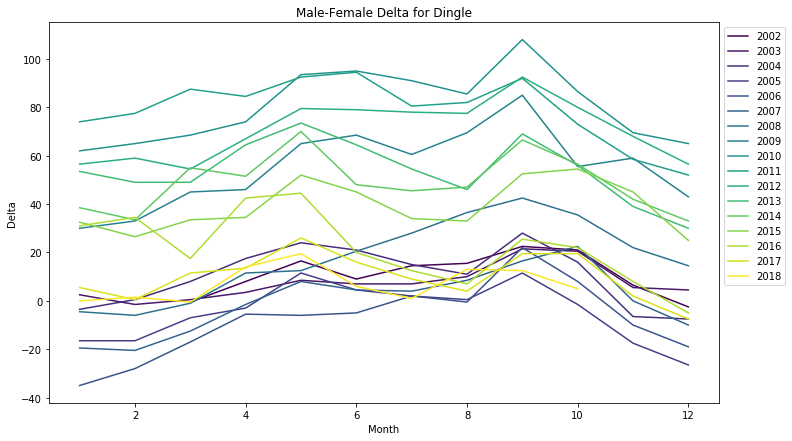

In [17]:
ax = mfr_dingle_df.pivot_table(
    values="Dingle", index="Month", columns="Year").plot(
    figsize=(12,7), colormap="viridis", title="Male-Female Delta for Dingle")
ax.legend(bbox_to_anchor=(1,1))
ax.set_ylabel("Delta")

# Consumer Goods Prices

In [18]:
df = pd.read_csv(raw_filename2, skiprows=2, encoding="ANSI").convert_objects(convert_numeric=True)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,,2011M12,2012M01,2012M02,2012M03,2012M04,2012M05,2012M06,2012M07,2012M08,...,2017M12,2018M01,2018M02,2018M03,2018M04,2018M05,2018M06,2018M07,2018M08,2018M09
0,"White, self raising flour per 2 kg",..,2.130,2.146,2.140,2.132,2.132,2.132,2.129,2.131,...,2.210,2.338,2.323,2.264,2.290,2.269,2.334,2.329,2.336,2.259
1,"Brown, wholemeal flour per 2 kg",..,2.495,2.466,2.485,2.504,2.485,2.475,2.486,2.511,...,2.836,2.840,2.825,2.833,2.824,2.822,2.803,2.802,2.842,2.764
2,"Bread, white sliced pan, large (800g)",..,1.276,1.275,1.281,1.291,1.306,1.299,1.279,1.269,...,1.268,1.268,1.282,1.300,1.303,1.295,1.282,1.283,1.290,1.285
3,"Bread, brown sliced pan, large (800g)",..,1.539,1.541,1.529,1.529,1.511,1.507,1.521,1.518,...,1.409,1.416,1.403,1.396,1.386,1.406,1.389,1.384,1.389,1.413
4,Spaghetti per 500g,..,1.202,1.186,1.196,1.170,1.175,1.141,1.141,1.172,...,1.069,1.100,1.038,1.090,1.102,1.115,1.067,1.077,0.997,1.085


* Flip index/columns
* Drop extra header row
* Change .. to NaN
* Drop full NaN year
* Parse dates

In [19]:
df2 = df.T
df2.columns = df2.iloc[0]
df2 = df2.drop(" ")
df2 = df2.replace("..", np.nan)
df2 = df2.drop(index="2011M12")
df2.index = pd.to_datetime(df2.index, format="%YM%m")
df2.to_csv(DATA_PATH + "irish_census_consumer_goods_prices.csv")

In [20]:
print(*df2.columns, sep="\n")

White, self raising flour per 2 kg
Brown, wholemeal flour per 2 kg
Bread, white sliced pan, large (800g)
Bread, brown sliced pan, large (800g)
Spaghetti per 500g
Sirloin steak per kg
Striploin steak per kg
Roast beef - topside or rib per kg
Sliced / diced beef pieces per kg
Pork loin chops per kg
Pork steak per kg
Lamb - whole leg / half leg per kg
Lamb loin chops per kg
Lamb gigot chops per kg
Uncooked chicken medium size 1.6kg
Lamb's liver per kg
Ham fillet per kg
Cooked ham per kg
Best back rashers per kg
Pork sausages per kg
Fresh fillet of whiting per kg
Fresh fillet of cod per kg
Fresh salmon per kg
Fresh fillet of plaice per kg
Fresh hake per kg
Smoked salmon per kg
Full fat milk per 2 litre
Low fat milk per 1 litre
Irish cheddar per kg
Large eggs per half dozen
Medium eggs per half dozen
Butter per lb
Grapes per kg
Bananas per kg
Tomatoes per kg
Onions per kg
Broccoli per kg
Carrots per kg
Mushrooms per kg
Tomatoes tinned per 400g
Potatoes 2.5 kg
Potatoes 7.5 kg
Potatoes 10 kg


* Filter by items
* Convert date to datetime

In [21]:
# items = ["Bananas per kg"]
# df3 = df2[items]

pattern = "(?i)bread"
df3 = df2.filter(regex=pattern, axis=1)

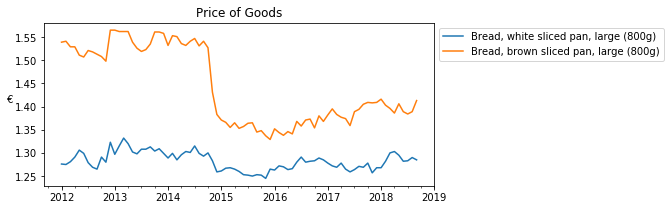

In [22]:
ax = df3.plot(title="Price of Goods", figsize=(7, 3))
ax.set_ylabel("€", rotation=0)
ax.legend(bbox_to_anchor=(1,1))

Text(0,0.5,'€')

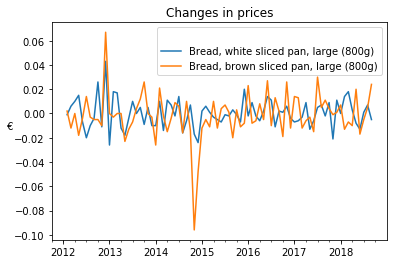

In [23]:
pattern = "(?i)bread"
df3 = df2.filter(regex=pattern, axis=1)

ax = df3.diff().plot(title="Changes in prices")
ax.set_ylabel("€", rotation=0)
# ax.legend(bbox_to_anchor=(1,1))

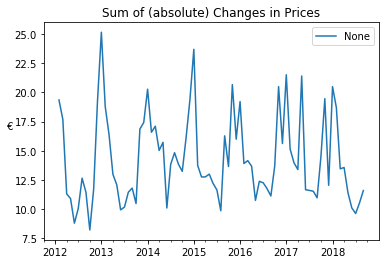

In [24]:
df3 = df2.diff().abs().sum(axis=1).drop(index=pd.datetime(2012, 1, 1))

ax = df3.plot(title="Sum of (absolute) Changes in Prices", legend=False)
ax.set_ylabel("€", rotation=0)
ax.legend(bbox_to_anchor=(1,1))

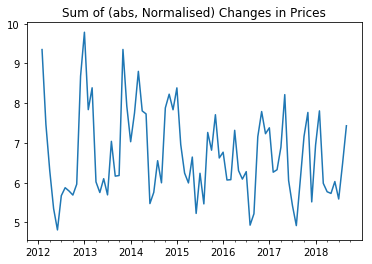

In [25]:
df3_n = (df2 - df2.mean()) / (df2.max() - df2.min())
df4 = df3_n.diff().abs().sum(axis=1).drop(index=pd.datetime(2012, 1, 1))

ax = df4.plot(title="Sum of (abs, Normalised) Changes in Prices", legend=False)

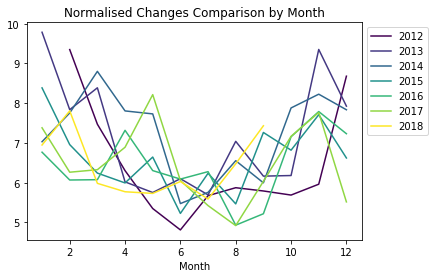

In [26]:
df5 = df4.to_frame("Change")
df5["Year"] = df5.index.year
df5["Month"] = df5.index.month

# pd.crosstab(index=df5.Month, columns=df5.Year, values=df5.Change, aggfunc="sum").plot()  # Same as pivot
ax = df5.pivot_table(values="Change", index="Month", columns="Year").plot(
    title="Normalised Changes Comparison by Month", legend=False, colormap="viridis")
ax.legend(bbox_to_anchor=(1,1))

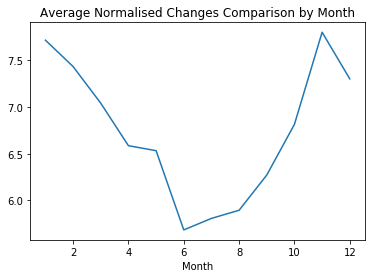

In [27]:
df5.pivot_table(values="Change", index="Month", columns="Year").mean(axis=1).plot(
    title="Average Normalised Changes Comparison by Month")